In [46]:
import pandas as pd
import numpy as np


In [47]:
df=pd.read_csv('train.csv')


In [48]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [49]:
df.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest','parch','sibsp'],axis=1,inplace=True)

In [50]:
df.isnull().sum()

pclass        0
sex           0
age         174
fare          1
embarked      1
survived      0
dtype: int64

In [51]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['fare'].fillna(df['fare'].mode()[0],inplace=True)


C:\Users\Abid.MD\AppData\Local\Temp\ipykernel_11736\2725343132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
C:\Users\Abid.MD\AppData\Local\Temp\ipykernel_11736\2725343132.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [52]:
df.isnull().sum()

pclass      0
sex         0
age         0
fare        0
embarked    0
survived    0
dtype: int64

In [53]:
x=df.drop('survived',axis=1)
y=df['survived']
x=pd.get_dummies(x)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train) 

y_pred=model.predict(X_test)




0.7466839677047289


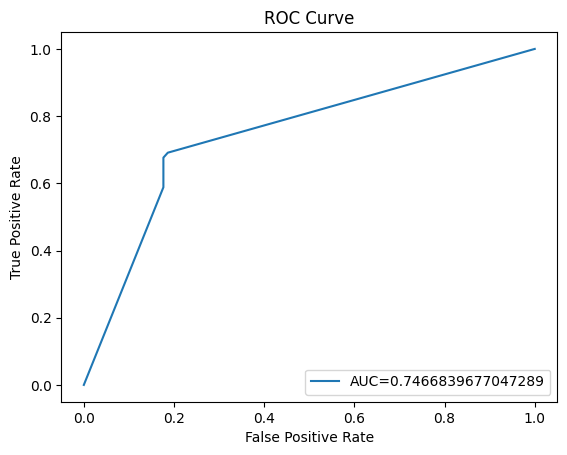

In [55]:
from sklearn.metrics import auc,roc_curve,roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()